In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('/content/drive/MyDrive/tcc/results.csv')

In [4]:
results.head()

,split,classifier,accuracy,f1,precision,recall,training_time
0,0,kNN,0.468484,0.468720,0.479470,0.468484,0.000461
1,0,SVM,0.846678,0.847276,0.850796,0.846678,0.130981
2,0,NB,0.783646,0.785710,0.788997,0.783646,0.003443
3,0,NN,0.867121,0.866893,0.866929,0.867121,0.365719
4,0,LR,0.894378,0.894552,0.894862,0.894378,0.047863


In [5]:
pd.options.display.float_format = '{:,.3f}'.format

In [6]:
mean_results = results.groupby('classifier')[['accuracy', 'f1', 'training_time']].mean()
mean_results

,accuracy,f1,training_time
classifier,,,
LR,0.900,0.900,0.049
NB,0.786,0.786,0.004
NN,0.867,0.867,0.398
RF,0.852,0.851,0.364
SVM,0.843,0.843,0.132
kNN,0.481,0.480,0.001


In [7]:
std_results = results.groupby('classifier')[['accuracy', 'f1', 'training_time']].std()
std_results

,accuracy,f1,training_time
classifier,,,
LR,0.010,0.010,0.009
NB,0.016,0.016,0.001
NN,0.013,0.013,0.109
RF,0.014,0.014,0.112
SVM,0.013,0.013,0.009
kNN,0.018,0.019,0.001


In [8]:
mean_std = mean_results.merge(std_results, on='classifier')
mean_std

,accuracy_x,f1_x,training_time_x,accuracy_y,f1_y,training_time_y
classifier,,,,,,
LR,0.900,0.900,0.049,0.010,0.010,0.009
NB,0.786,0.786,0.004,0.016,0.016,0.001
NN,0.867,0.867,0.398,0.013,0.013,0.109
RF,0.852,0.851,0.364,0.014,0.014,0.112
SVM,0.843,0.843,0.132,0.013,0.013,0.009
kNN,0.481,0.480,0.001,0.018,0.019,0.001


In [9]:
mean_std = mean_std[['accuracy_x', 'accuracy_y', 'f1_x', 'f1_y', 'training_time_x', 'training_time_y']]
mean_std

,accuracy_x,accuracy_y,f1_x,f1_y,training_time_x,training_time_y
classifier,,,,,,
LR,0.900,0.010,0.900,0.010,0.049,0.009
NB,0.786,0.016,0.786,0.016,0.004,0.001
NN,0.867,0.013,0.867,0.013,0.398,0.109
RF,0.852,0.014,0.851,0.014,0.364,0.112
SVM,0.843,0.013,0.843,0.013,0.132,0.009
kNN,0.481,0.018,0.480,0.019,0.001,0.001


In [10]:
mean_results 

,accuracy,f1,training_time
classifier,,,
LR,0.900,0.900,0.049
NB,0.786,0.786,0.004
NN,0.867,0.867,0.398
RF,0.852,0.851,0.364
SVM,0.843,0.843,0.132
kNN,0.481,0.480,0.001


In [11]:
melt_df = pd.melt(results, id_vars =['classifier'], value_vars =['accuracy', 'f1'])
melt_df

,classifier,variable,value
0,kNN,accuracy,0.468
1,SVM,accuracy,0.847
2,NB,accuracy,0.784
3,NN,accuracy,0.867
4,LR,accuracy,0.894
...,...,...,...
355,SVM,f1,0.836
356,NB,f1,0.801
357,NN,f1,0.855
358,LR,f1,0.889


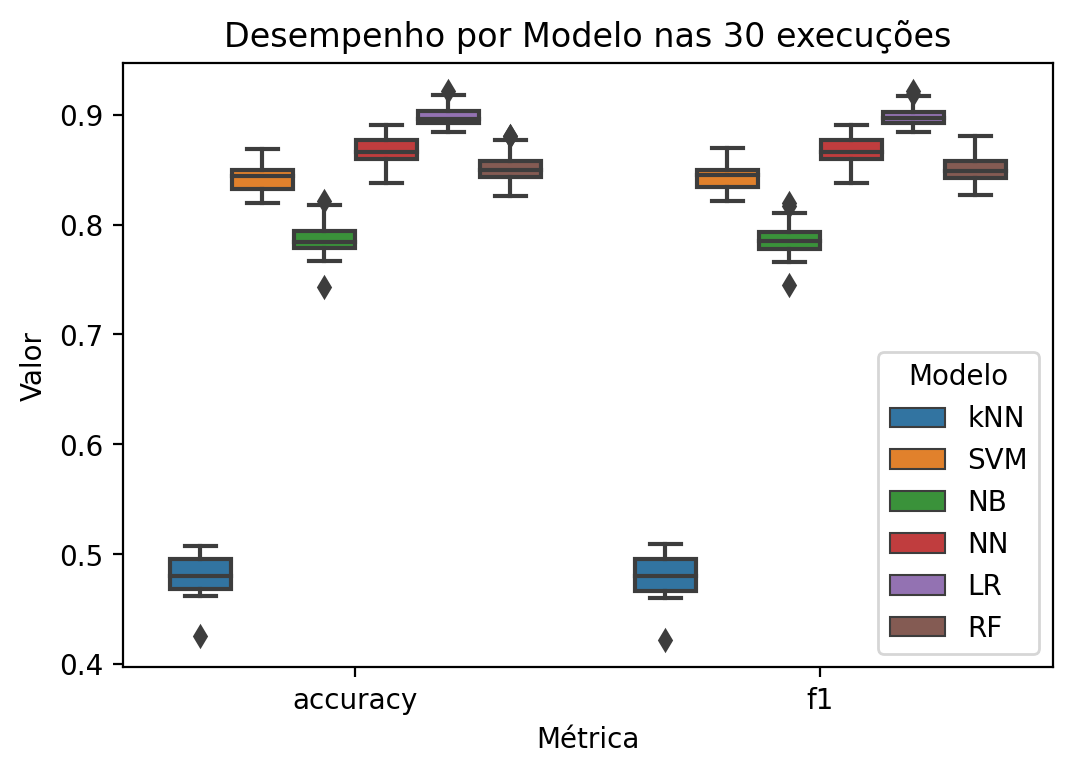

In [21]:
plt.figure(dpi=200)

sns.boxplot(data=melt_df,
            x='variable',
            y='value',
            hue='classifier')

plt.title('Desempenho por Modelo nas 30 execuções')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.legend(title='Modelo')
